In [1]:
!nvidia-smi

Thu Dec  8 09:41:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 460.27.04    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:3B:00.0 Off |                  N/A |
| 30%   29C    P8     3W / 250W |   7408MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:5E:00.0 Off |                  N/A |
| 30%   

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [19]:
# import needed libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score

In [4]:
sign_data_set = pd.read_csv("model-sign-dataset_cleaned_.csv")
sign_data_set

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,COVID-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,Yes
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,Yes
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,Yes
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,Yes
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,Yes
5430,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,Yes
5431,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,No
5432,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,No


In [5]:
sign_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   int64 
 1   Fever                                    5434 non-null   int64 
 2   Dry Cough                                5434 non-null   int64 
 3   Sore throat                              5434 non-null   int64 
 4   Running Nose                             5434 non-null   int64 
 5   Asthma                                   5434 non-null   int64 
 6   Chronic Lung Disease                     5434 non-null   int64 
 7   Headache                                 5434 non-null   int64 
 8   Heart Disease                            5434 non-null   int64 
 9   Diabetes                                 5434 non-null   int64 
 10  Hyper Tension                            5434 non-null   int

In [6]:
# Extract Independet variables
sign_x = sign_data_set.iloc[:, :-1].values

# Extract the Dependet variable
sign_y = sign_data_set['COVID-19'].values

# Incode the ouput data (dependent variable)
labelencoder_y= LabelEncoder()
sign_y = labelencoder_y.fit_transform(sign_y) 

In [7]:
# split the dataset into traning and validation sets
sign_Xtrain, sign_Xtest, sign_Ytrain, sign_Ytest= train_test_split(sign_x, sign_y, test_size= 0.15)

In [8]:
# convert input datasets of traning and testing to float32 for numpy operations
sign_Xtrain, sign_Xtest = np.array(sign_Xtrain, np.float32), np.array(sign_Xtest, np.float32)

In [9]:
sign_Xtrain.shape

(4618, 19)

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

XGBC = XGBClassifier(random_state=101)
XGBC.fit(sign_Xtrain,sign_Ytrain)

XGBC_prediction_train = XGBC.predict(sign_Xtrain)
XGBC_prediction_test  = XGBC.predict(sign_Xtest)
print()
print("Train Accurecy Score - " + str(accuracy_score(sign_Ytrain,XGBC_prediction_train)))
print(classification_report(sign_Ytrain,XGBC_prediction_train))
print()
print("Test Accurecy Score - " + str(accuracy_score(sign_Ytest,XGBC_prediction_test)))
print(classification_report(sign_Ytest,XGBC_prediction_test))
print()


/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:42:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Train Accurecy Score - 0.9820268514508446
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       905
           1       0.99      0.99      0.99      3713

    accuracy                           0.98      4618
   macro avg       0.97      0.98      0.97      4618
weighted avg       0.98      0.98      0.98      4618


Test Accurecy Score - 0.9865196078431373
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       146
           1       0.99      0.99      0.99       670

    accuracy                           0.99       816
   macro avg       0.98      0.97      0.98       816
weighted avg       0.99      0.99      0.99       816




In [47]:
len(sign_x)

5434

In [12]:
import shap
# compute SHAP values
XGBC_explainer = shap.TreeExplainer(XGBC, sign_x)
XGBC_shap_values = XGBC_explainer.shap_values(sign_x,check_additivity=True)

 95%|=================== | 5151/5434 [00:15<00:00]       

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


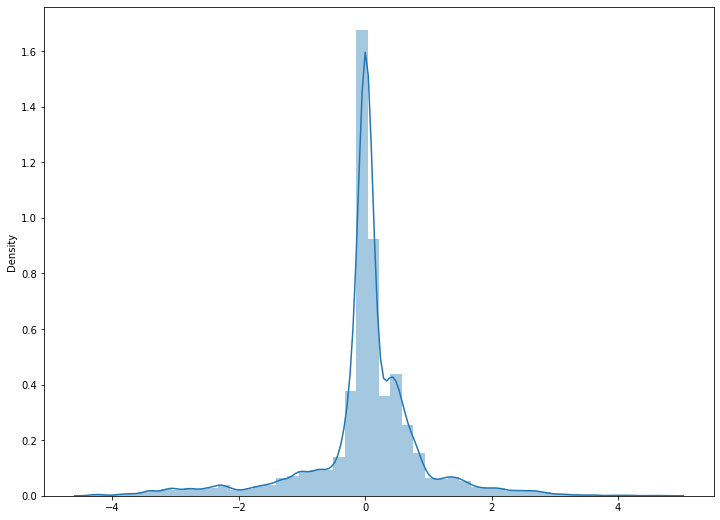

In [40]:
plt.rcParams["figure.figsize"] = (12,9)
sns.distplot(XGBC_shap_values)
plt.show()

In [41]:
XGBC_shap_values.max()

4.764647284601815

In [42]:
XGBC_shap_values.mean()

0.008176748208209341

In [43]:
XGBC_shap_values.min()

-4.328760245478771

In [13]:
XGBC_dfShap = pd.DataFrame(XGBC_shap_values,columns=sign_data_set.iloc[:, :-1].columns,index=sign_data_set.index)

XGBC_dfShap_temp = XGBC_dfShap[:].copy()

In [14]:
XGBC_dfShap_temp

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks
0,0.896573,0.633475,0.671194,0.739993,-0.241841,0.228861,-0.066498,0.055035,0.352905,0.360132,0.068703,-0.112743,0.076096,-0.966125,1.084288,-1.175722,-0.010479,1.079362,0.0
1,1.164092,0.619528,0.477567,0.553612,0.517164,0.132143,-0.000601,-0.017298,0.092658,-0.070783,0.297484,-0.028308,0.017217,-0.619645,-0.219501,2.138653,0.030599,-0.160031,0.0
2,0.890194,0.471624,0.565871,0.410680,-0.345459,-0.169352,0.069881,0.037141,0.011283,0.150048,0.170977,-0.042419,0.051941,2.745147,-0.313658,-0.964485,0.032844,-0.434014,0.0
3,0.840690,0.326465,0.432122,-1.164142,0.272832,0.182989,0.034890,-0.059914,-0.131512,0.127670,0.178232,0.009431,-0.007346,1.906693,-0.364323,1.586107,-0.014385,-0.156530,0.0
4,0.783881,0.474715,0.616392,0.623525,-0.411805,0.184230,0.293464,0.002865,-0.264756,0.319569,-0.245387,0.013857,0.225503,-1.159280,1.253397,-1.601364,0.124986,-0.553273,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1.721259,0.458548,-2.345930,0.725785,-0.753009,-0.103050,0.194205,-0.172078,-0.046297,-0.021497,0.118694,-0.194591,-0.056182,-1.890075,-0.680469,-2.285292,-0.106553,-0.992657,0.0
5430,1.577461,0.646450,0.713984,-1.790544,-0.723698,-0.146258,-0.077227,-0.132904,0.270022,0.166135,-0.301467,-0.061674,-0.317980,-2.096818,-0.882260,-2.404266,-0.100967,-0.745760,0.0
5431,1.499542,0.664811,0.615980,-1.874885,0.433157,-0.032545,0.017241,-0.315137,-0.663526,-0.132047,-0.150005,-0.012708,-0.392554,-2.088710,-0.929238,-2.381812,0.036047,-0.632870,0.0
5432,1.474495,0.721266,0.670233,-1.920654,-0.490332,-0.093656,-0.033893,0.093694,-0.248406,-0.094140,0.196351,0.016818,-0.425067,-2.107843,-0.872587,-2.466196,0.032698,-0.685942,0.0


In [16]:
len(sign_y)

5434

In [20]:
sign_y

array([1, 1, 1, ..., 0, 0, 0])

In [17]:
XGBC_dfShap_temp['label'] = sign_y

In [21]:
XGBC_dfShap_temp_pos = XGBC_dfShap_temp[XGBC_dfShap_temp['label']==1]

In [44]:
XGBC_dfShap_temp_neg = XGBC_dfShap_temp[XGBC_dfShap_temp['label']==0]

In [22]:
XGBC_dfShap_temp_pos

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,label
0,0.896573,0.633475,0.671194,0.739993,-0.241841,0.228861,-0.066498,0.055035,0.352905,0.360132,0.068703,-0.112743,0.076096,-0.966125,1.084288,-1.175722,-0.010479,1.079362,0.0,1
1,1.164092,0.619528,0.477567,0.553612,0.517164,0.132143,-0.000601,-0.017298,0.092658,-0.070783,0.297484,-0.028308,0.017217,-0.619645,-0.219501,2.138653,0.030599,-0.160031,0.0,1
2,0.890194,0.471624,0.565871,0.410680,-0.345459,-0.169352,0.069881,0.037141,0.011283,0.150048,0.170977,-0.042419,0.051941,2.745147,-0.313658,-0.964485,0.032844,-0.434014,0.0,1
3,0.840690,0.326465,0.432122,-1.164142,0.272832,0.182989,0.034890,-0.059914,-0.131512,0.127670,0.178232,0.009431,-0.007346,1.906693,-0.364323,1.586107,-0.014385,-0.156530,0.0,1
4,0.783881,0.474715,0.616392,0.623525,-0.411805,0.184230,0.293464,0.002865,-0.264756,0.319569,-0.245387,0.013857,0.225503,-1.159280,1.253397,-1.601364,0.124986,-0.553273,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5426,1.577461,0.646450,0.713984,-1.790544,-0.723698,-0.146258,-0.077227,-0.132904,0.270022,0.166135,-0.301467,-0.061674,-0.317980,-2.096818,-0.882260,-2.404266,-0.100967,-0.745760,0.0,1
5427,1.499542,0.664811,0.615980,-1.874885,0.433157,-0.032545,0.017241,-0.315137,-0.663526,-0.132047,-0.150005,-0.012708,-0.392554,-2.088710,-0.929238,-2.381812,0.036047,-0.632870,0.0,1
5428,1.474495,0.721266,0.670233,-1.920654,-0.490332,-0.093656,-0.033893,0.093694,-0.248406,-0.094140,0.196351,0.016818,-0.425067,-2.107843,-0.872587,-2.466196,0.032698,-0.685942,0.0,1
5429,1.721259,0.458548,-2.345930,0.725785,-0.753009,-0.103050,0.194205,-0.172078,-0.046297,-0.021497,0.118694,-0.194591,-0.056182,-1.890075,-0.680469,-2.285292,-0.106553,-0.992657,0.0,1


In [45]:
XGBC_dfShap_temp_neg

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,label
4075,-3.660512,-1.748721,-3.520156,-2.729777,-0.105522,-0.040785,0.035919,-0.021819,-0.114504,-0.198070,0.008353,-0.021400,-0.087434,-2.654518,-1.242732,2.667645,-0.053784,0.384126,0.0,0
4076,-3.312165,-1.166116,-3.670128,-3.338204,-0.051003,0.018574,-0.002231,0.039129,0.001990,-0.306898,0.021046,-0.074120,-0.069898,-2.291873,1.351695,2.576585,0.062791,0.458881,0.0,0
4077,-2.783806,-1.608614,-2.112466,-2.777505,-0.137944,-0.054752,0.090778,0.001788,0.133931,-0.062186,0.036081,-0.018648,-0.097269,-3.434543,-1.305501,-2.248247,-0.109663,0.494089,0.0,0
4078,-3.514844,-1.565655,-3.433388,-2.747903,-0.148511,0.106978,0.028000,-0.012476,0.146378,0.263974,0.072973,0.059287,-0.064592,-2.538927,-1.041500,2.833531,0.013781,-0.267014,0.0,0
4079,-3.439304,-1.562068,-2.263699,-2.752251,-0.149930,-0.041502,0.058427,0.041684,0.189782,0.135114,0.005896,-0.014288,0.140072,-3.373840,-1.243903,-2.327426,0.149998,0.674410,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5121,0.404483,0.384614,0.532136,0.610262,-0.584929,-0.305819,-0.439205,0.018809,-0.214465,-0.275847,-0.357387,-0.427796,-0.073597,-1.755810,0.386480,-2.056902,-0.333583,-1.077194,0.0,0
5122,-3.343851,-1.727220,0.621207,-3.239138,0.164652,0.000273,-0.036881,-0.012979,0.019164,-0.296112,-0.030673,0.027107,-0.052682,-2.794489,1.350677,-2.949997,-0.146989,-0.340964,0.0,0
5431,1.499542,0.664811,0.615980,-1.874885,0.433157,-0.032545,0.017241,-0.315137,-0.663526,-0.132047,-0.150005,-0.012708,-0.392554,-2.088710,-0.929238,-2.381812,0.036047,-0.632870,0.0,0
5432,1.474495,0.721266,0.670233,-1.920654,-0.490332,-0.093656,-0.033893,0.093694,-0.248406,-0.094140,0.196351,0.016818,-0.425067,-2.107843,-0.872587,-2.466196,0.032698,-0.685942,0.0,0


Text(0, 0.5, 'Distance')

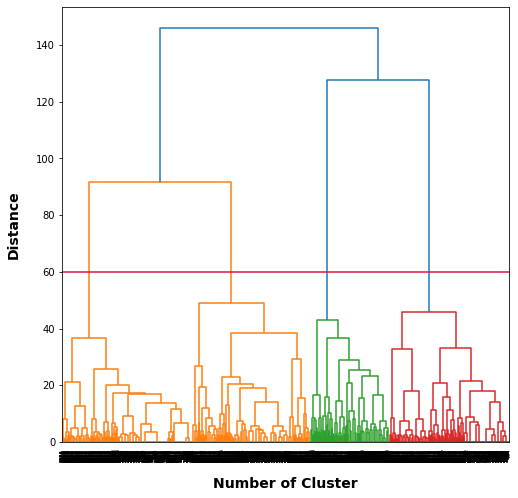

In [24]:
clusters = hierarchy.linkage(XGBC_dfShap_temp_pos, method="ward")
plt.figure(figsize=(8, 8))
dendrogram = hierarchy.dendrogram(clusters)
plt.axhline(60, color='crimson');
plt.xlabel("Number of Cluster", labelpad=15, weight='bold', size=14)
plt.ylabel("Distance", labelpad=15, weight='bold', size=14)

In [25]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(XGBC_dfShap_temp_pos)
labels = clustering_model.labels_

XGBC_dfShap_temp_pos['CLUSTER'] = labels


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [26]:
XGBC_dfShap_temp_pos['CLUSTER'].unique()

array([2, 0, 1, 3])

In [31]:
len(XGBC_dfShap_temp_pos[XGBC_dfShap_temp_pos['CLUSTER']==0])

1157

In [28]:
len(XGBC_dfShap_temp_pos[XGBC_dfShap_temp_pos['CLUSTER']==1])

1166

In [29]:
len(XGBC_dfShap_temp_pos[XGBC_dfShap_temp_pos['CLUSTER']==2])

775

In [30]:
len(XGBC_dfShap_temp_pos[XGBC_dfShap_temp_pos['CLUSTER']==3])

1285

In [35]:
XGBC_dfShap_temp_pos.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks', 'label',
       'CLUSTER'],
      dtype='object')

In [34]:
XGBC_dfShap_temp_pos[XGBC_dfShap_temp_pos['CLUSTER']==0]['Breathing Problem'].describe()

count    1157.000000
mean        0.632705
std         0.953516
min        -3.044397
25%         0.725470
50%         0.806455
75%         1.180029
max         2.111614
Name: Breathing Problem, dtype: float64

In [37]:
XGBC_dfShap_temp_pos[XGBC_dfShap_temp_pos['CLUSTER']==0]['Fever'].describe()

count    1157.000000
mean        0.242695
std         0.586283
min        -1.756734
25%         0.330885
50%         0.407588
75%         0.552973
max         0.959354
Name: Fever, dtype: float64